<a href="https://colab.research.google.com/github/Mariamng/Learning/blob/main/17_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Understanding the data

In [1]:
import pandas as pd
advertising = pd.read_csv("/content/tvmarketing.csv")

# TV - advertising budget spent on TV marketing
# Sales - actual sales (revenue, income)
advertising.head() #first 5 rows

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [2]:
advertising.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


Regression plot

<Axes: xlabel='TV', ylabel='Sales'>

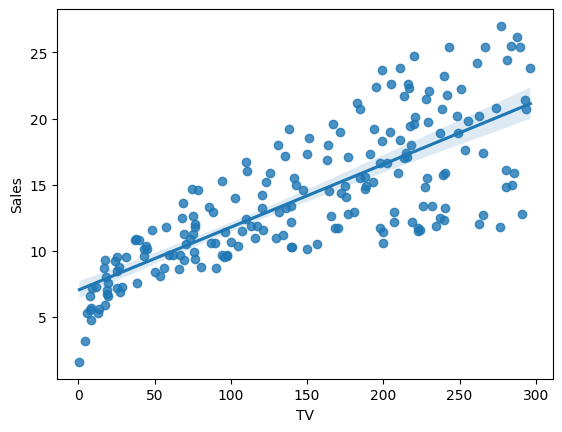

In [3]:
import seaborn as sns
sns.regplot(x="TV", y="Sales", data=advertising)

<Axes: xlabel='TV', ylabel='Sales'>

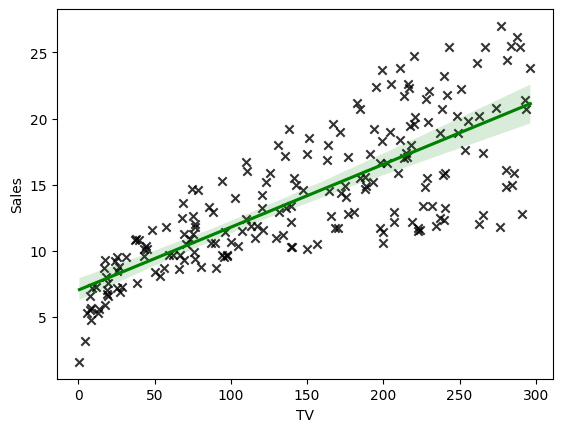

In [4]:
sns.regplot(
    data=advertising,
    x='TV',
    y="Sales",
    ci=99,
    marker="x",
    color="black",
    line_kws=dict(color="green"))

In [5]:
#Pearson correlation koefficient
advertising.corr()

,TV,Sales
TV,1.000000,0.782224
Sales,0.782224,1.000000


In [6]:
advertising["TV"].corr(advertising["Sales"]) #positive, strong

0.7822244248616061

### SUPERVISED VS UNSUPERVISED
![jupyter.png](https://miro.medium.com/v2/resize:fit:960/1*31iqrQyCqIuuGPLUK_BjMQ.png)

Training linera regression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [7]:
#Preparing X and Y
X = advertising.drop("Sales", axis=1) #independent variable
X.head()


,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [8]:
Y = advertising.drop("TV", axis=1) #dependent variable
Y.head()

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


Train/Test sets


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.7, random_state=42)
X_train

,TV
180,156.6
178,276.7
185,205.0
49,66.9
80,76.4
34,95.7
7,120.2
110,225.8
91,28.6
83,68.4


In [10]:
# COLUMN - FEATURE
# ROW - OBSERVATION

###Train the model


In [11]:
from sklearn.linear_model import LinearRegression #import the model
model = LinearRegression() #initialize the model
model.fit(X_train, Y_train) #fit the model

LinearRegression()

In [13]:
### Y=mX + b ###

print(f'Model intercept is: {model.intercept_}')
print(f'Model coefficient is: {model.coef_}')

Model intercept is: [7.1119333]
Model coefficient is: [[0.04477964]]


A prediction

In [23]:
my_new_budget = [[150]] #2D array dataset
my_predicted_sales = model.predict(my_new_budget)
my_predicted_sales
print(f'When the new budget is {my_new_budget[0][0]}, then predicted sales are {round(my_predicted_sales[0][0])}.')

When the new budget is 150, then predicted sales are 14.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [24]:
X_test.head()


,TV
95,163.3
15,195.4
30,292.9
158,11.7
128,220.3


In [29]:
y_pred =model.predict(X_test)
final_df = pd.DataFrame()
final_df['TV'] = X_test
final_df['Actual_sales'] = Y_test
final_df['Predicted_sales'] = y_pred
final_df.head()

,TV,Actual_sales,Predicted_sales
95,163.3,16.9,14.424449
15,195.4,22.4,15.861875
30,292.9,21.4,20.227890
158,11.7,7.3,7.635855
128,220.3,24.7,16.976888


In [30]:
final_df['ABS_Error_Actual_vs_Predicted'] = abs(final_df['Actual_sales'] - final_df['Predicted_sales'])
final_df.head()

,TV,Actual_sales,Predicted_sales,ABS_Error_Actual_vs_Predicted
95,163.3,16.9,14.424449,2.475551
15,195.4,22.4,15.861875,6.538125
30,292.9,21.4,20.227890,1.172110
158,11.7,7.3,7.635855,0.335855
128,220.3,24.7,16.976888,7.723112
